In [3]:
# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
# 2. Load dataset from CSV
train_df = pd.read_csv("fashion-mnist_train.csv")
test_df = pd.read_csv("fashion-mnist_test.csv")

# 3. Split features and labels
X_train = train_df.iloc[:, 1:].values.reshape(-1, 28, 28, 1) / 255.0
y_train = train_df.iloc[:, 0].values

X_test = test_df.iloc[:, 1:].values.reshape(-1, 28, 28, 1) / 255.0
y_test = test_df.iloc[:, 0].values

In [5]:
# 4. Define CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # 10 categories
])

# 5. Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 6. Train model
history = model.fit(X_train, y_train, epochs=10, validation_split=0.1, verbose=2)

c:\Users\darsh\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1688/1688 - 19s - 11ms/step - accuracy: 0.8201 - loss: 0.4915 - val_accuracy: 0.8717 - val_loss: 0.3542
Epoch 2/10
1688/1688 - 17s - 10ms/step - accuracy: 0.8765 - loss: 0.3364 - val_accuracy: 0.8938 - val_loss: 0.3010
Epoch 3/10
1688/1688 - 16s - 9ms/step - accuracy: 0.8908 - loss: 0.2925 - val_accuracy: 0.8958 - val_loss: 0.2777
Epoch 4/10
1688/1688 - 16s - 10ms/step - accuracy: 0.9029 - loss: 0.2631 - val_accuracy: 0.8873 - val_loss: 0.3045
Epoch 5/10
1688/1688 - 16s - 10ms/step - accuracy: 0.9108 - loss: 0.2375 - val_accuracy: 0.9033 - val_loss: 0.2600
Epoch 6/10
1688/1688 - 16s - 10ms/step - accuracy: 0.9166 - loss: 0.2221 - val_accuracy: 0.9072 - val_loss: 0.2526
Epoch 7/10
1688/1688 - 16s - 9ms/step - accuracy: 0.9221 - loss: 0.2078 - val_accuracy: 0.9130 - val_loss: 0.2435
Epoch 8/10
1688/1688 - 17s - 10ms/step - accuracy: 0.9270 - loss: 0.1922 - val_accuracy: 0.9160 - val_loss: 0.2349
Epoch 9/10
1688/1688 - 16s - 10ms/step - accuracy: 0.9312 - loss: 0.1803 - val_acc

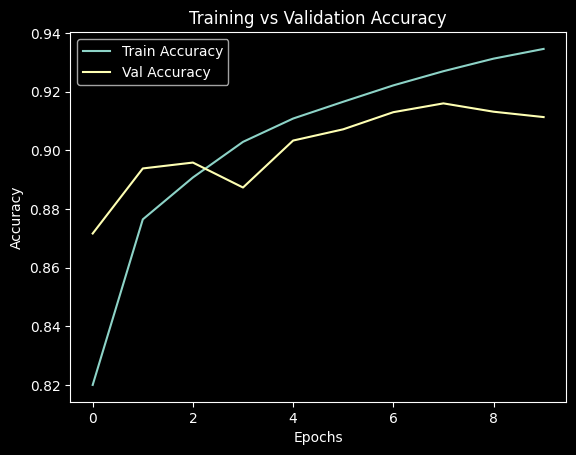

In [6]:
# 7. Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [7]:
# 8. Evaluate on test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.2f}")

Test Accuracy: 0.92


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


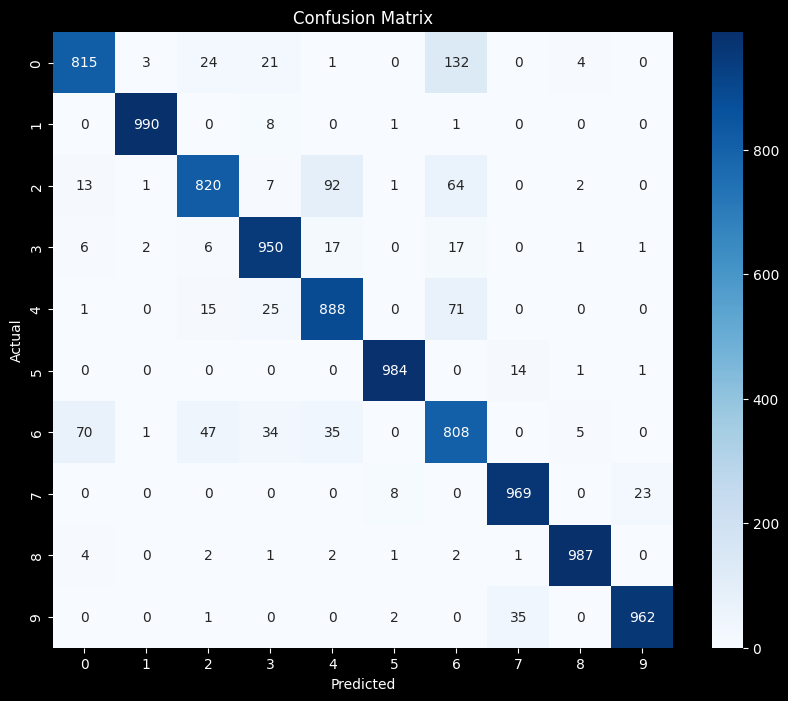

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.81      0.85      1000
           1       0.99      0.99      0.99      1000
           2       0.90      0.82      0.86      1000
           3       0.91      0.95      0.93      1000
           4       0.86      0.89      0.87      1000
           5       0.99      0.98      0.99      1000
           6       0.74      0.81      0.77      1000
           7       0.95      0.97      0.96      1000
           8       0.99      0.99      0.99      1000
           9       0.97      0.96      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [8]:
# 9. Predict and evaluate
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

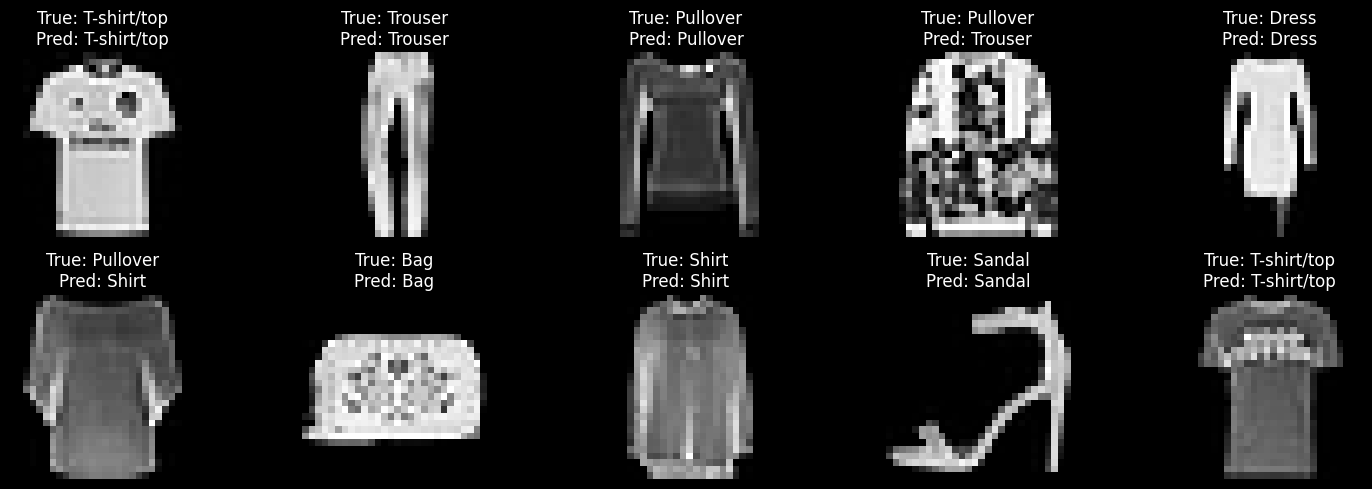

In [9]:
# 10. Show 10 predictions vs actual labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(15, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.title(f"True: {class_names[y_test[i]]}\nPred: {class_names[y_pred[i]]}")
plt.tight_layout()
plt.show()